In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import random
import seaborn as sns

## Import Data


In [3]:
file_to_load = "Resources/Pokemon_main_values.csv"
chart_to_load = "resources/chart.csv"
Pokemon_chart = pd.read_csv(chart_to_load)
Pokemon_data = pd.read_csv(file_to_load)
Pokemon_data
#Pokemon_chart

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6


## Clean Data

## Random Pokemon Generator

In [4]:
randomnum = random.randrange(0, 799)
random_pokemon= Pokemon_data.loc[randomnum]
random_pokemon

#                364
Name          Sealeo
Type 1           Ice
Total            410
HP                90
Attack            60
Defense           70
Sp. Atk           75
Sp. Def           70
Speed             45
Generation         3
Name: 399, dtype: object

## Number of Resistances and Effectivenesses by Type 

In [5]:
TypeChart = pd.DataFrame()

PokemonTypesChart = list(Pokemon_chart.columns)
PokemonTypesChart.remove("Attacking")

WeaknessList = []

for index, row in Pokemon_chart.iterrows():
    effective = row.loc[row ==2.0]
    effective = len(effective)
    TypeChart.loc[index, 'Type'] = row.Attacking
    TypeChart.loc[index, 'Effective'] = effective

for column in PokemonTypesChart:
    weakness = (Pokemon_chart[column].loc[Pokemon_chart[column] == 2.0])
    weakness = len(weakness)
    WeaknessList.append(weakness)
TypeChart["Weakness"] = WeaknessList

#Clean Table
TypeChart.Effective = TypeChart.Effective.astype(int)
TypeChart.head()
TypeChart = TypeChart.set_index("Type")
TypeChart

,Effective,Weakness
Type,,
Normal,0,1
Fire,4,3
Water,3,2
Electric,2,1
Grass,3,5
Ice,4,4
Fighting,5,3
Poison,2,2
Ground,5,3


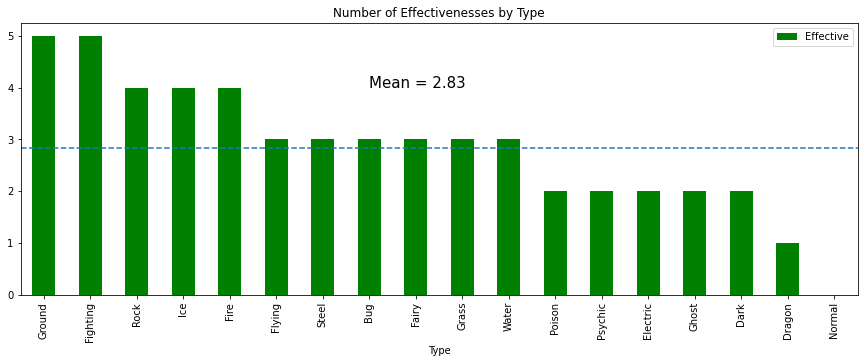

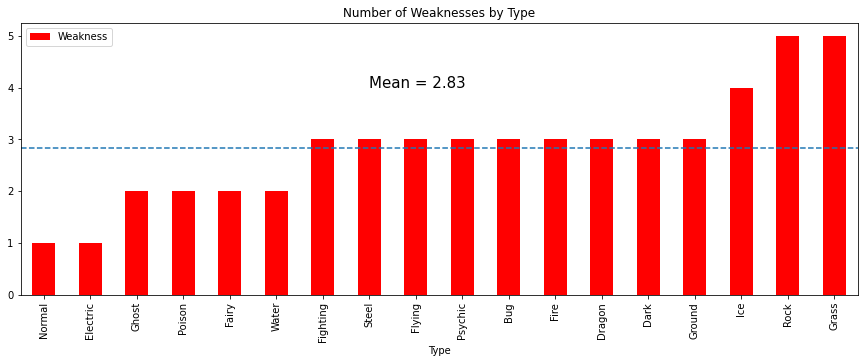

In [45]:
EffectiveTable = TypeChart.drop(['Weakness'], axis=1)
MeanEffectiveTable = float(round(EffectiveTable.mean(), 2))
EffectiveTable =EffectiveTable.sort_values('Effective', ascending = False)
EffectiveBar =(EffectiveTable.plot(kind="bar", title = 'Number of Effectivenesses by Type', color = "g",figsize=(15,5)).axhline(y=MeanEffectiveTable, linestyle='--'))
plt.annotate(f'Mean = {MeanEffectiveTable}', (7,4),fontsize=15,color="black")
plt.savefig(f"output/Number_of_Effectivenesses_by_Type")
plt.show()

WeaknessTable = TypeChart.drop(['Effective'], axis=1)
MeanWeaknessTable = float(round(WeaknessTable.mean(), 2))
WeaknessTable =WeaknessTable.sort_values('Weakness')
WeaknessBar =(WeaknessTable.plot(kind="bar", title = 'Number of Weaknesses by Type', color = "r", figsize=(15,5)).axhline(y=MeanWeaknessTable, linestyle='--'))
plt.annotate(f'Mean = {MeanWeaknessTable}', (7,4),fontsize=15,color="black")
plt.savefig(f"output/Number_of_Weaknesses_by_Type")
plt.show()




## Pokemon Ranking

In [7]:
Pokemon_data.columns

Index(['#', 'Name', 'Type 1', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation'],
      dtype='object')

In [8]:
filtered_df = Pokemon_data[['Name','Type 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
filtered_df.head()

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65


In [9]:
Poke_df = filtered_df.loc[Pokemon_data["Type 1"] == random_pokemon[2]] 
Poke_df

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
133,Jynx,Ice,65,50,35,115,95,95
156,Articuno,Ice,90,85,100,95,125,85
238,Swinub,Ice,50,50,40,30,30,50
239,Piloswine,Ice,100,100,80,60,60,50
243,Delibird,Ice,45,55,45,65,45,75
257,Smoochum,Ice,45,30,15,85,65,65
395,Snorunt,Ice,50,50,50,50,50,50
396,Glalie,Ice,80,80,80,80,80,80
397,GlalieMega Glalie,Ice,80,120,80,120,80,100
398,Spheal,Ice,70,40,50,55,50,25


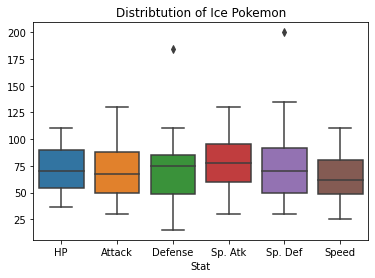

In [43]:
sns.boxplot(data=Poke_df)
plt.title(f"Distribtution of {random_pokemon[2]} Pokemon")
plt.xlabel("Stat")
plt.savefig(f"output/Distribtution_of_{random_pokemon[2]}_Pokemon")
plt.show()

In [27]:
stats_Pokemon_data = Pokemon_data.drop(['Total','Generation'], axis =1)

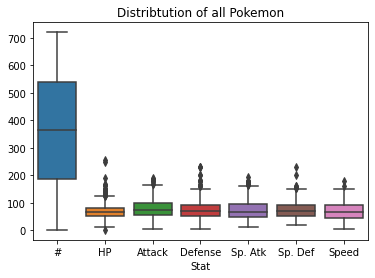

In [44]:
sns.boxplot(data=stats_Pokemon_data)
plt.title(f"Distribtution of all Pokemon")
plt.xlabel("Stat")
plt.savefig(f"output/Distribtution_of_All_Pokemon")
plt.show()

## Attack vs Defense Correlation by Type

The r-squared is : 0.5407436570609246


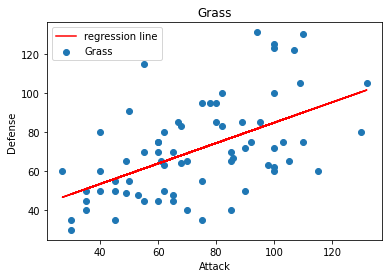

The r-squared is : 0.3646922464208141


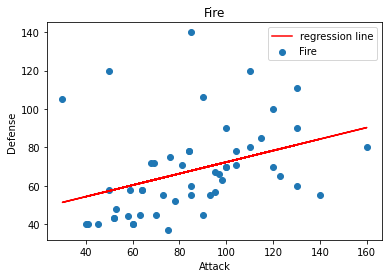

The r-squared is : 0.5161628601933552


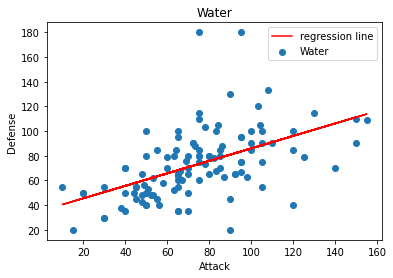

The r-squared is : 0.3616215020498733


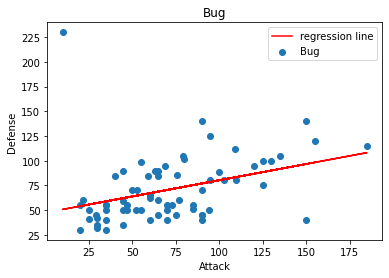

The r-squared is : 0.7385103231619193


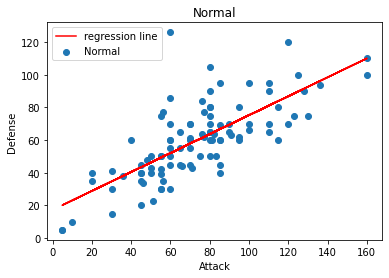

The r-squared is : 0.4625410313806518


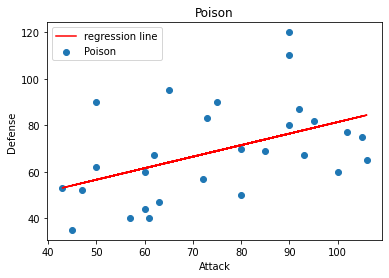

The r-squared is : 0.3334156983184261


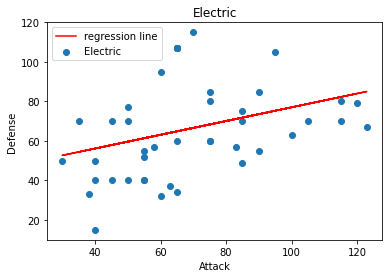

The r-squared is : 0.5972335985090407


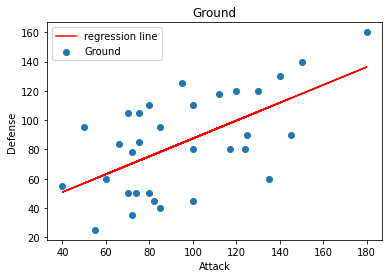

The r-squared is : 0.523612960905597


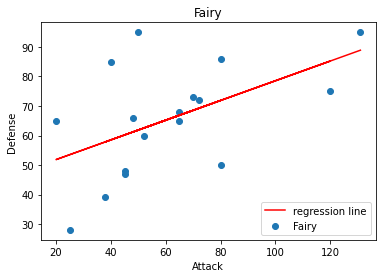

The r-squared is : 0.6225040313285795


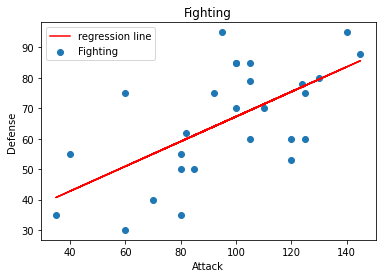

The r-squared is : 0.3369307970184637


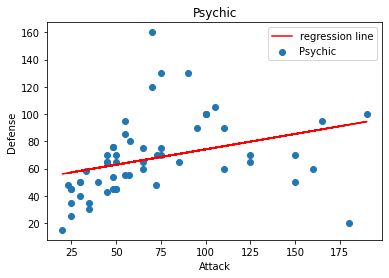

The r-squared is : -0.08795074385851193


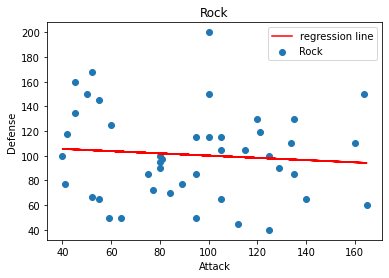

The r-squared is : 0.33069172109805284


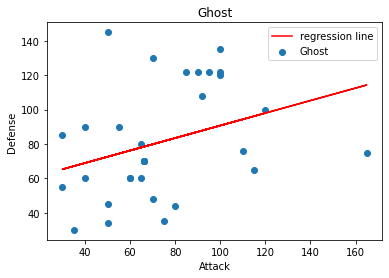

The r-squared is : 0.6150229920595143


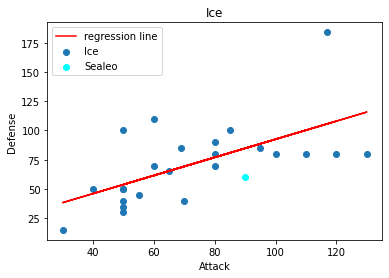

The r-squared is : 0.6652140439722745


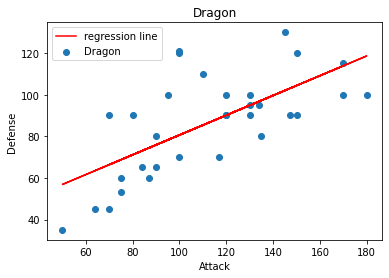

The r-squared is : 0.19584500776797661


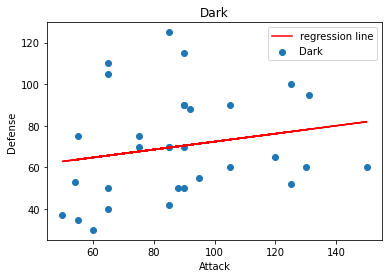

The r-squared is : 0.3721024900597843


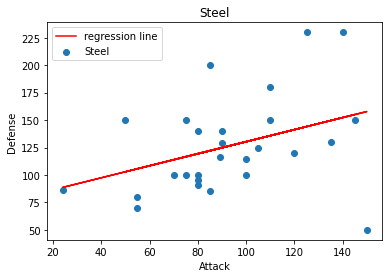

The r-squared is : 0.7620679139659167


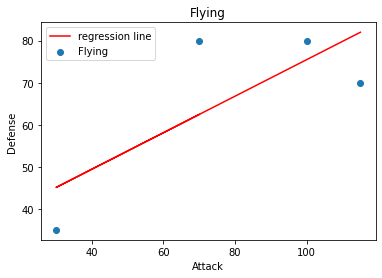

In [42]:
poke_list = list(Pokemon_data['Type 1'].unique())

rvalue_list = []

for i in poke_list:
    
    poke_df = Pokemon_data.loc[Pokemon_data['Type 1'] == i]
    
    x = poke_df['Attack']
    y = poke_df['Defense']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f'The r-squared is : {rvalue}')
    regress_value = x * slope + intercept
    rvalue_list.append(rvalue)
    
    plt.scatter(x,y)
    plt.plot(x,regress_value,"r-")
    
    plt.title(i)
    
    plt.xlabel('Attack')
    plt.ylabel('Defense')
    if i == random_pokemon[2]:
        plt.scatter(random_pokemon[4], random_pokemon[5], color = "cyan")
        plt.legend(["regression line", i, random_pokemon[1]])
    else:
        plt.legend(["regression line", i])
    plt.savefig(f"output/Attack_VS_Defense/{i}_Attack_VS_Defense")
    plt.show()

## Statistical Analysis of Attack vs Defense  by Type

In [34]:
attack_median = []
attack_lq = []
attack_uq = []
attack_iqr = []
attack_lb = []
attack_ub = []

defense_median = []
defense_lq = []
defense_uq = []
defense_iqr = []
defense_lb = []
defense_ub = []

for i in poke_list:
    poke_df = Pokemon_data.loc[Pokemon_data['Type 1'] == i]
    
    quartiles_a = poke_df["Attack"].quantile([.25,.5,.75])
    lowerq_a = quartiles_a[0.25]
    upperq_a = quartiles_a[0.75]
    iqr_a = upperq_a-lowerq_a
    lower_bound_a = lowerq_a - (1.5*iqr_a)
    upper_bound_a = upperq_a + (1.5*iqr_a)
        
    quartiles_d = poke_df["Defense"].quantile([.25,.5,.75])
    lowerq_d = quartiles_d[0.25]
    upperq_d = quartiles_d[0.75]
    iqr_d = upperq_d-lowerq_d
    lower_bound_d = lowerq_d - (1.5*iqr_d)
    upper_bound_d = upperq_d + (1.5*iqr_d)
    
    attack_median.append(quartiles_a[0.5])
    attack_lq.append(lowerq_a)
    attack_uq.append(upperq_a)
    attack_iqr.append(iqr_a)
    attack_lb.append(lower_bound_a)
    attack_ub.append(upper_bound_a)
    defense_median.append(quartiles_d[0.5])
    defense_lq.append(lowerq_d)
    defense_uq.append(upperq_d)
    defense_iqr.append(iqr_d)
    defense_lb.append(lower_bound_d)
    defense_ub.append(upper_bound_d)
    
    print(f"----------{i}--------------")
    print("Attack")
    print(f"Median: {quartiles_a[.5]}")
    print(f"Lower quartile: {lowerq_a}")
    print(f"Upper quartile:{upperq_a}")
    print(f"Interquartile: {iqr_a}")
    print(f"Values above {upper_bound_a} could be outliers")
    print(f"Values below {lower_bound_a} could be outliers")
    print("Defense")
    print(f"Median: {quartiles_d[.5]}")
    print(f"Lower quartile: {lowerq_d}")
    print(f"Upper quartile: {upperq_d}")
    print(f"Interquartile: {iqr_d}")
    print(f"Values above {upper_bound_d} could be outliers")
    print(f"Values below {lower_bound_d} could be outliers")
   

----------Grass--------------
Attack
Median: 70.0
Lower quartile: 55.0
Upper quartile:93.5
Interquartile: 38.5
Values above 151.25 could be outliers
Values below -2.75 could be outliers
Defense
Median: 66.0
Lower quartile: 50.0
Upper quartile: 84.5
Interquartile: 34.5
Values above 136.25 could be outliers
Values below -1.75 could be outliers
----------Fire--------------
Attack
Median: 84.5
Lower quartile: 62.25
Upper quartile:101.0
Interquartile: 38.75
Values above 159.125 could be outliers
Values below 4.125 could be outliers
Defense
Median: 64.0
Lower quartile: 51.0
Upper quartile: 78.0
Interquartile: 27.0
Values above 118.5 could be outliers
Values below 10.5 could be outliers
----------Water--------------
Attack
Median: 72.0
Lower quartile: 53.0
Upper quartile:92.0
Interquartile: 39.0
Values above 150.5 could be outliers
Values below -5.5 could be outliers
Defense
Median: 70.0
Lower quartile: 54.5
Upper quartile: 88.5
Interquartile: 34.0
Values above 139.5 could be outliers
Values 

In [41]:
poke_table = pd.DataFrame({'Type':poke_list,
                             'Attack Median':attack_median,
                             'Lower quartile': attack_lq,
                             'Upper quartile':attack_uq,
                             'Attack Iqr':attack_iqr,
                             'Lower bound':attack_lb,
                             'Upper bound':attack_ub,
                             'Defense Median':defense_median,
                             'Loewr quartile':defense_lq,
                             'Upper quartile':defense_uq,
                             'Defense Iqr':defense_iqr,
                             'Lower bound':defense_lb,
                             'Upper bound':defense_ub,
                             'R-value':rvalue_list
                            })
poke_table.to_csv('output/pokemon_statistics.csv', index = False)
poke_table

,Type,Attack Median,Lower quartile,Upper quartile,Attack Iqr,Lower bound,Upper bound,Defense Median,Loewr quartile,Defense Iqr,R-value
0,Grass,70.0,55.00,84.50,38.50,-1.750,136.250,66.0,50.00,34.50,0.540744
1,Fire,84.5,62.25,78.00,38.75,10.500,118.500,64.0,51.00,27.00,0.364692
2,Water,72.0,53.00,88.50,39.00,3.500,139.500,70.0,54.50,34.00,0.516163
3,Bug,65.0,45.00,90.00,45.00,-10.000,150.000,60.0,50.00,40.00,0.361622
4,Normal,70.5,55.00,73.75,30.00,-2.500,119.500,60.0,43.25,30.50,0.738510
5,Poison,74.0,60.00,82.25,30.50,8.500,126.500,67.0,52.75,29.50,0.462541
6,Electric,65.0,53.75,80.00,31.25,4.375,125.375,65.0,49.75,30.25,0.333416
7,Ground,85.0,72.00,110.00,49.00,-30.625,194.375,84.5,53.75,56.25,0.597234
8,Fairy,52.0,45.00,75.00,27.00,12.500,112.500,66.0,50.00,25.00,0.523613
9,Fighting,100.0,80.00,79.50,40.00,15.750,117.750,70.0,54.00,25.50,0.622504
